In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cx_Oracle

In [2]:
def get_data_from_db(query):
    conn = cx_Oracle.connect('hoseo', 'hoseo', 'localhost:1521/xe')
    df = pd.read_sql(query, conn)
    conn.close()
    return df

In [3]:
region_table = [
    '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
    '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시',
    '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

time_table = [
    '2012', '2013', '2014', '2015', '2016',
    '2017', '2018', '2019', '2020']

In [4]:
# 지역별 평균 면적
def make_region_size():
    for year in time_table:

        query = f"""
            SELECT REGION, AVG(APT_SIZE)
            FROM APT_DEAL_PRICE
            GROUP BY REGION
            """

        que = get_data_from_db(query)

        if year == '2012':
            data = que.copy()
        else:
            data = data.merge(que)

    data.to_csv('data-files2/region_size.csv', index=False, encoding='utf-8-sig')

In [5]:
make_region_size()

In [6]:
apt_size_mean = pd.read_csv('data-files2/region_size.csv')
apt_size_mean

,REGION,AVG(APT_SIZE)
0,세종특별자치시,77.735900
1,충청남도,70.299182
2,서울특별시,78.369842
3,경상북도,71.402030
4,대구광역시,80.739046
5,인천광역시,75.196776
6,충청북도,67.884089
7,강원도,67.972494
8,전라남도,70.180932
9,경기도,78.337085


In [7]:
def make_region_price():
    for year in time_table:

        query = f"""
            SELECT REGION, AVG(CONTRACT_PRICE)
            FROM APT_DEAL_PRICE
            GROUP BY REGION
            """

        que = get_data_from_db(query)

        if year == '2012':
            data = que.copy()
        else:
            data = data.merge(que)

    data.to_csv('data-files2/region_price.csv', index=False, encoding='utf-8-sig')

In [8]:
make_region_price()

In [9]:
pd.options.display.float_format='{:.0f}'.format

In [10]:
apt_price_mean = pd.read_csv('data-files2/region_price.csv')
apt_price_mean

,REGION,AVG(CONTRACT_PRICE)
0,세종특별자치시,306621939
1,충청남도,158313744
2,서울특별시,577731785
3,경상북도,138856796
4,대구광역시,260564110
5,인천광역시,249249389
6,충청북도,148687928
7,강원도,128358638
8,전라남도,128951207
9,경기도,308328235


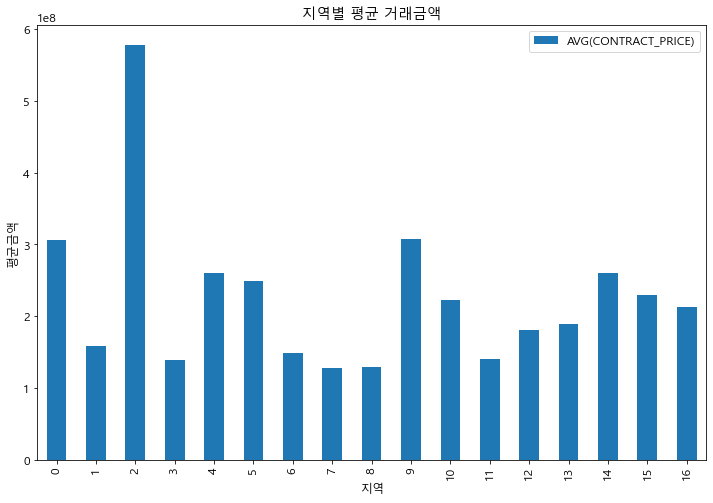

In [13]:
from matplotlib import pyplot

apt_price_mean.plot(kind='bar')

pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 12
pyplot.rcParams["figure.figsize"] = (12, 8)

pyplot.title('지역별 평균 거래금액')
pyplot.ylabel('평균금액')
pyplot.xlabel('지역')

plt.show()

In [17]:
def make_region_price_count():
    for year in time_table:

        query = f"""
            SELECT REGION, COUNT(*)
            FROM APT_DEAL_PRICE
            GROUP BY REGION
            """

        que = get_data_from_db(query)

        if year == '2012':
            data = que.copy()
        else:
            data = data.merge(que)

    data.to_csv('data-files2/region_price_count.csv', index=False, encoding='utf-8-sig')

In [18]:
make_region_price_count()


In [22]:
region_price_count = pd.read_csv('data-files2/region_price_count.csv')
region_price_count

,REGION,COUNT(*)
0,세종특별자치시,28056
1,충청남도,197043
2,서울특별시,714309
3,경상북도,196949
4,대구광역시,257323
5,인천광역시,316098
6,충청북도,143874
7,강원도,142353
8,전라남도,137316
9,경기도,1334713
